In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


In [ ]:
data=pd.read_csv("Data file.csv")
data

THERE ARE 209593 ROWS AND 37 COLUMNS

In [ ]:
data.head()

Displays top 5 rows

In [ ]:
data.dropna()

There is no null values in the data

In [ ]:
data.keys()

Checking the data and visualizing

In [ ]:
data["aon"].value_counts()

In [ ]:
data["daily_decr30"].value_counts()

In [ ]:
data.label

In [ ]:
data.pdate

In [ ]:
data["label"].unique()

In [ ]:
data["label"].value_counts()

In [ ]:
data["medianamnt_loans30"].value_counts()

In [ ]:
data["medianamnt_loans90"].value_counts()

Data is imbalanced

In [ ]:
data["pcircle"].unique()

In [ ]:
data.drop("msisdn",axis=1,inplace=True)

In [ ]:
data.drop("pcircle",axis=1,inplace=True)

dropped the modile number column and telecom circle as it has no impact on the result

In [ ]:
data.pdate = pd.to_datetime(data.pdate)

In [ ]:
data["months"]=data["pdate"].dt.month

In [ ]:
data["days"]=data["pdate"].dt.day

In [ ]:
data["years"]=data["pdate"].dt.year

feature engineering is done to convert the date column to int datatype

In [ ]:
data.drop("years",axis=1,inplace=True)

dropped the years column as it has only one unique value

In [ ]:
data.dtypes

In [ ]:
data.drop("pdate",axis=1,inplace=True)

dropped the pdate column as months days and years column has already been made

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
scaledX=scaler.fit_transform(data)

In [ ]:
scaledX

In [ ]:
data.info()

There are int, float datatypes

In [ ]:
data.columns

In [ ]:
data.describe()

The standard deviation is too high for some columns it means the data is deviated.
There is much skweness in the data as the difference between the mean and median is more.
There are extreme outliers in many columns as there is difference between 75% and max

In [ ]:
data.isnull()

In [ ]:
sns.heatmap(data.isnull())

There is no null vales in the dataset

In [ ]:
dfcor=data.corr()

In [ ]:
dfcor

In [ ]:
sns.heatmap(dfcor)

In [ ]:
plt.figure(figsize=(35,32))
sns.heatmap(dfcor,cmap="Blues",annot=True)

correlation of columns with each other

In [ ]:
collist=data.columns.values
ncol=37
nrows=15


plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data[collist[i]],color="green",orient="v")
    plt.tight_layout()

There are outliers present in the dataset

In [ ]:
from scipy.stats import zscore

z=np.abs(zscore(data))
print(z)

In [ ]:
new_data=data[(z<3).any(axis=1)]

In [ ]:
new_data.shape

In [ ]:
data.shape

In [ ]:
data.skew()

In [ ]:
x=data.drop("label",axis=1)
y=data["label"]

x is the input columns and y is the output data

In [ ]:
x.iloc[:,0:10].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [ ]:
x.iloc[:,10:20].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [ ]:
x.iloc[:,20:30].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [ ]:
x.iloc[:,30:40].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

seggregated the data into columns so that the data can be clear

In [ ]:
data.skew()

In [ ]:
data["label"].plot.box()

In [ ]:
data["aon"].plot.box()

In [ ]:
#!pip install imblearn

from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over, y_over = SM.fit_resample(x,y)

balancing the data

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

In [ ]:
df_out= data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

Removing the skewness

In [306]:
data.shape

(209593, 36)

In [307]:
df_out.shape

(56628, 36)

In [308]:
data.skew()

Unnamed: 0               0.000000
label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90  

In [309]:
df_out.skew()

Unnamed: 0              0.002247
label                   0.000000
aon                     0.905383
daily_decr30            1.821084
daily_decr90            1.920208
rental30                1.834453
rental90                1.860095
last_rech_date_ma       1.392794
last_rech_date_da       0.000000
last_rech_amt_ma        0.907622
cnt_ma_rech30           0.536512
fr_ma_rech30            1.228827
sumamnt_ma_rech30       1.059663
medianamnt_ma_rech30    0.387214
medianmarechprebal30    1.293127
cnt_ma_rech90           0.640386
fr_ma_rech90            1.515090
sumamnt_ma_rech90       1.102399
medianamnt_ma_rech90    0.403662
medianmarechprebal90    1.238261
cnt_da_rech30           0.000000
fr_da_rech30            0.000000
cnt_da_rech90           0.000000
fr_da_rech90            0.000000
cnt_loans30             0.977192
amnt_loans30            0.977192
maxamnt_loans30         0.000000
medianamnt_loans30      0.000000
cnt_loans90             1.104574
amnt_loans90            1.104574
maxamnt_lo

In [310]:
data.keys()

Index(['Unnamed: 0', 'label', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'months', 'days'],
      dtype='object')

In [ ]:
x=df_out.drop("label",axis=1)
y=df_out["label"]

seprating the output and input data

In [311]:
y.value_counts()

1    56628
Name: label, dtype: int64

In [312]:
y_over.value_counts()

1    183431
0    183431
Name: label, dtype: int64

In [313]:
x_over.shape

(366862, 35)

In [314]:
y_over.shape

(366862,)

In [315]:
train_x,test_x,train_y,test_y=train_test_split(x_over,y_over,test_size=.28,random_state=45)

In [316]:
train_x.shape

(264140, 35)

In [317]:
test_x.shape

(102722, 35)

In [318]:
train_y.shape

(264140,)

In [319]:
test_y.shape

(102722,)

train and test data is prepared

In [320]:
lg=LogisticRegression()

In [321]:
lg.fit(train_x,train_y)

LogisticRegression()

In [322]:
pred=lg.predict(test_x)

In [323]:
print("accuracy score:",accuracy_score(test_y,pred))

accuracy score: 0.7357041334864975


In [324]:
print(confusion_matrix(test_y,pred))

[[41729  9669]
 [17480 33844]]


In [325]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75     51398
           1       0.78      0.66      0.71     51324

    accuracy                           0.74    102722
   macro avg       0.74      0.74      0.73    102722
weighted avg       0.74      0.74      0.73    102722



In [326]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

In [327]:
y_pred_prob=lg.predict_proba(test_x)[:,1]

In [328]:
y_pred_prob

array([0.24561566, 0.66994242, 0.12992051, ..., 0.49579677, 0.38240387,
       0.96085583])

In [329]:
fpr,tpr,thresholds=roc_curve(test_y,y_pred_prob)

In [330]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99998054, 1.        ,
       1.        ])

In [331]:
tpr

array([0.00000000e+00, 5.65037799e-04, 6.04005923e-04, ...,
       9.99980516e-01, 9.99980516e-01, 1.00000000e+00])

In [332]:
thresholds

array([2.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       1.43815627e-03, 1.27966895e-03, 6.58480388e-04])

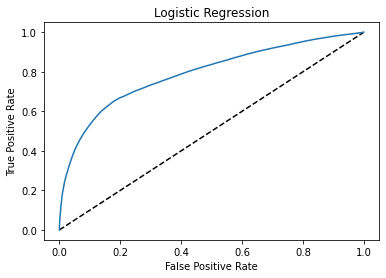

In [333]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression")
plt.show()

Printing the auc roc curve

In [336]:
auc_score=roc_auc_score(test_y,lg.predict(test_x))

In [337]:
print(auc_score)

0.7356492176356431


In [338]:
from sklearn.tree import DecisionTreeRegressor
dt =DecisionTreeRegressor()
dt.fit(train_x,train_y)
p=dt.predict(test_x)
print(accuracy_score(test_y,p))

0.9074492319074784


In [339]:
df1=pd.DataFrame(p)
df1.to_csv("micro credit.csv")

In [341]:
import joblib
joblib.dump(df1,"micro credit.pkl")

['micro credit.pkl']